# <font color='black'>**Heart Failure Prediction (PRML Course Project)**</font>

#### Mounting Drive on Google Colab

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing basic libraries

In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the dataset from drive

In [298]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Preprocessing of the dataset

In [299]:
data.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [314]:
data.isnull() #checking null values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [315]:
data.duplicated().sum # checking if there is any null value in any row

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool>

In [316]:
data.isnull().sum() # sum of null values of every feature

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [317]:
data.shape # shape of the dataset

(918, 12)

In [318]:
data.head() # top 5 rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Visualization of the dataset

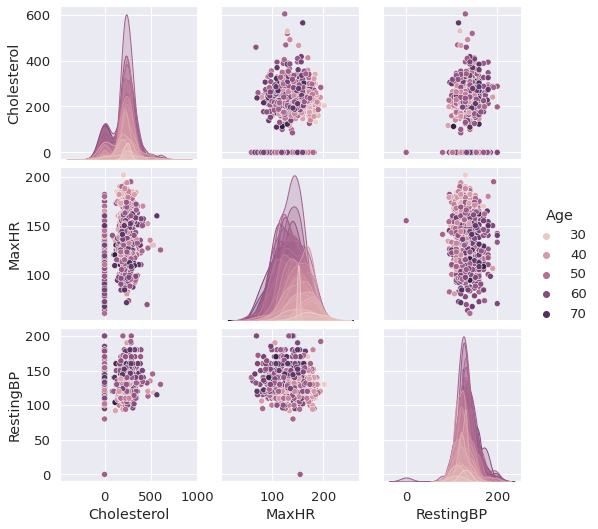

In [306]:
sns.pairplot(data[["Age", "Cholesterol", "MaxHR", "RestingBP"]], hue="Age")

#### Visualizing the distribution of categorical features of dataset

In [309]:
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(10,5.9)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

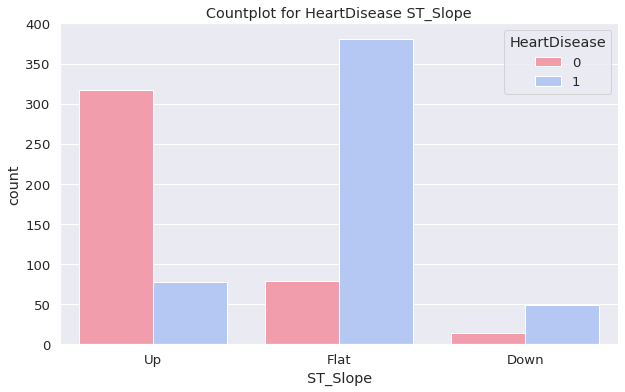

In [319]:
distribution_categorical_features(data, 'ST_Slope', 'HeartDisease', ["#ff8fa3","#abc4ff"]) # visualization of ST_Slope feature

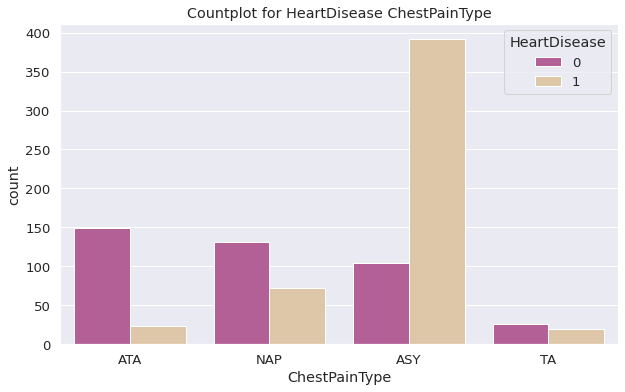

In [320]:
distribution_categorical_features(data, 'ChestPainType', 'HeartDisease', ["#c05299","#e7c8a0"])  # visualization of ChestPainType feature

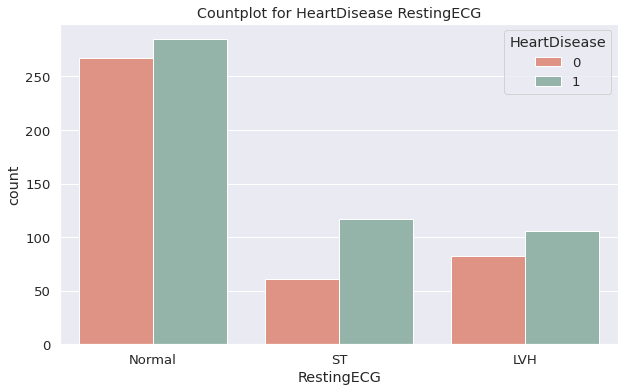

In [321]:
distribution_categorical_features(data, 'RestingECG', 'HeartDisease', ["#ED8975","#8FB9AA"])  # visualization of RestingECG feature

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

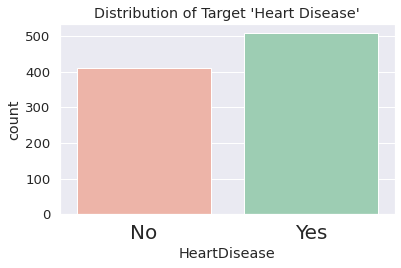

In [322]:
plt.figure(figsize=(6, 3.5)) # Visualization of target feature
heartDisease_countplot = sns.countplot(x=data.HeartDisease,palette=["#f8ad9d","#95d5b2"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
df_v=data.copy()
df_v['HeartDisease']=df_v['HeartDisease'].map({1:'HeartDisease',0:'No HeartDisease'})
df_v['Sex']=df_v['Sex'].map({'M':'Male','F':'Female'})
fig = px.sunburst(df_v, path=['Sex', 'HeartDisease'] ,color='HeartDisease',
                    color_discrete_map={'(?)':'black', 'HeartDisease':'Red', 'No HeartDisease':'Green'},
                    title='Heart disease - Gender')
fig.show()

### Exploratory Data Analysis

In [328]:
# This function calculates the probability of heart failure with a coundition on a feature.
def probability_calculation(feature, feature_values) : 
    first_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[0])])
    num_first_value = len(data[data[feature]==feature_values[0]])

    second_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[1])])
    num_second_value = len(data[data[feature]==feature_values[1]])
    print('Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)

In [329]:
probability_calculation('Sex', ['M', 'F']) # Probability of a particular gender having heart failure

Probability of Sex : M to have Heart disease: 0.6317241379310344
Probability of Sex : F to have Heart disease: 0.25906735751295334


In [330]:
probability_calculation('ExerciseAngina', ['Y', 'N']) # Probability of a ExerciseAngine having heart failure

Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


In [331]:
probability_calculation("FastingBS", [1,0]) #Probability of having heart failure at a particular FastingBS

Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


In [332]:
data.corr()['HeartDisease'] # Finding the correlation of different features with respect to output

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

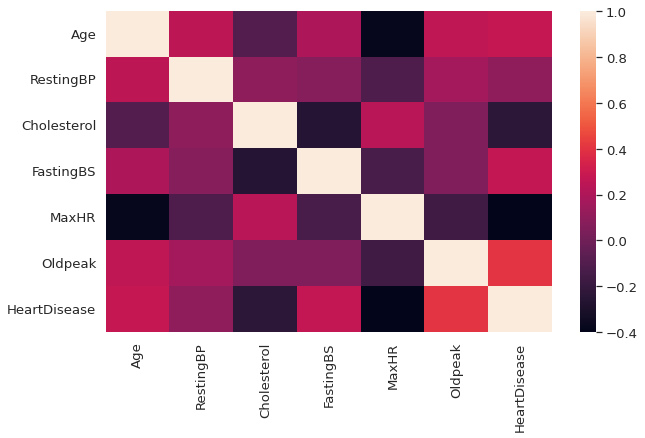

In [333]:
sns.heatmap(data.corr()) # plotting the heatmao of correlation between 2 features

In [334]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### Dividing the dataset into two groups (to_be_predicted_feature and input_features)

In [335]:
x= data.drop(columns=['HeartDisease'])
y=data['HeartDisease']

#### Splitting the dataset into training and testing dataset

In [336]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [337]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
712,58,M,ASY,100,234,0,Normal,156,N,0.1,Up
477,61,M,ASY,110,0,1,Normal,108,Y,2.0,Down
409,53,M,NAP,160,0,1,LVH,122,Y,0.0,Flat
448,63,M,ASY,160,230,1,Normal,105,Y,1.0,Flat
838,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up


In [338]:
Y_train

712    1
477    1
409    1
448    1
838    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 642, dtype: int64

# Implementing different models and building a pipeline

#### Importing necessary libraries

In [345]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## Model 1 : RandomForestClassifier

#### Implementing RandomizedSearchCV to identify the best parameters

In [342]:
# gridParams = {
#     'n_estimators': range(90,400),
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(3,16),
#     'min_samples_split' : range(2,10),
#     'min_samples_leaf' : range(2,10),
#     'max_features' : ['auto', 'sqrt', 'log2']
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(RandomForestClassifier(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [343]:
# print(step2.best_params_)
# {'n_estimators': 141, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy'}

### Analysing 1st Model

In [344]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
],remainder='passthrough')

step2 = RandomForestClassifier(min_samples_split = 5, max_features = 'auto', criterion = 'entropy', n_estimators = 141, min_samples_leaf = 4, max_depth = 8, random_state=39)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('Accuracy score',accuracy_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

Accuracy score 0.8840579710144928
MAE 0.11594202898550725


#### Classification report of 1st model on the given dataset

In [346]:
report_rfc = pd.DataFrame(classification_report(Y_test, y_pred, 
                                               output_dict=True, 
                                               target_names=["0", "1"]))
report_rfc

,0,1,accuracy,macro avg,weighted avg
precision,0.863636,0.897590,0.884058,0.880613,0.883812
recall,0.848214,0.908537,0.884058,0.878375,0.884058
f1-score,0.855856,0.903030,0.884058,0.879443,0.883887
support,112.000000,164.000000,0.884058,276.000000,276.000000


#### ROC curve for 1st model

Text(0.5, 0, 'False Positive Rate')

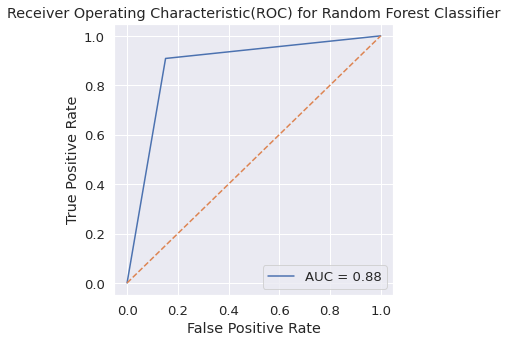

In [347]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)

auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5, 5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Random Forest Classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Model 2 : KNeighborsClassifier

#### Implementing RandomizedSearchCV to identify the best parameters

In [349]:
# gridParams = {
#     'n_neighbors': range(2,10),
#     'weights': ['uniform', 'distance'],
#     'leaf_size' : range(20,50),
#     'p' : range(1,10),
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(KNeighborsClassifier(),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing the best parameters

In [350]:
# print(step2.best_params_)
# {'weights' : 'distance', 'p': 1, 'n_neighbors' : 7, 'leaf_size' : 36}

### Analysing 2nd Model

In [351]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
],remainder='passthrough')

step2 = KNeighborsClassifier(weights = 'distance', p=1, n_neighbors = 7, leaf_size = 36)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('Accuracy score',accuracy_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

Accuracy score 0.7463768115942029
MAE 0.2536231884057971


#### Classification report of 2nd model on the given dataset

In [352]:
report_rfc = pd.DataFrame(classification_report(Y_test, y_pred, 
                                               output_dict=True, 
                                               target_names=["0", "1"]))
report_rfc

,0,1,accuracy,macro avg,weighted avg
precision,0.675000,0.801282,0.746377,0.738141,0.750037
recall,0.723214,0.762195,0.746377,0.742705,0.746377
f1-score,0.698276,0.781250,0.746377,0.739763,0.747579
support,112.000000,164.000000,0.746377,276.000000,276.000000


#### ROC curve for 2nd model

Text(0.5, 0, 'False Positive Rate')

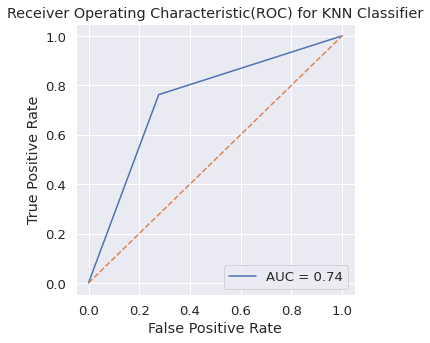

In [353]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)

auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5, 5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for KNN Classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Model 3 : DecisionTreeClassifier

#### Implementing RandomizedSearchCV to identify the best parameters

In [354]:
# gridParams = {
#     'splitter': ['best', 'random'],
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(3,16),
#     'min_samples_split' : range(2,10),
#     'min_samples_leaf' : range(2,10),
#     'max_features' : ['auto', 'sqrt', 'log2']
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing best parameters

In [355]:
# print(step2.best_params_)
# {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}

### Analysing 3rd model

In [356]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
],remainder='passthrough')

step2 = DecisionTreeClassifier(min_samples_split = 7, max_features = 'auto', criterion = 'entropy', splitter = 'best' , min_samples_leaf = 7, max_depth = 7, random_state = 0)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('Accuracy score',accuracy_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

Accuracy score 0.8514492753623188
MAE 0.14855072463768115


#### Classification report of 3rd model on the given dataset

In [357]:
report_rfc = pd.DataFrame(classification_report(Y_test, y_pred, 
                                               output_dict=True, 
                                               target_names=["0", "1"]))
report_rfc

,0,1,accuracy,macro avg,weighted avg
precision,0.798319,0.891720,0.851449,0.845020,0.853818
recall,0.848214,0.853659,0.851449,0.850936,0.851449
f1-score,0.822511,0.872274,0.851449,0.847392,0.852080
support,112.000000,164.000000,0.851449,276.000000,276.000000


#### ROC curve for 3rd model

Text(0.5, 0, 'False Positive Rate')

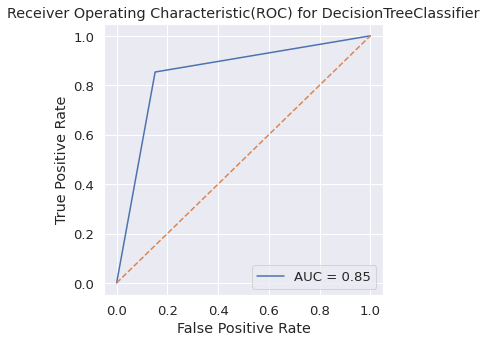

In [358]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)

auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5, 5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for DecisionTreeClassifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Model 4 : XGBClassifier

#### Implementing RandomizedSearchCV to identify the best parameters

In [360]:
# from sklearn.model_selection import RandomizedSearchCV
# gridParams = {
#     'n_estimators' : range(1,200),
#     'max_depth' : range(3,16)
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(XGBClassifier(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing best parameters

In [361]:
# print(step2.best_params_)
# {'n_estimators': 39, 'max_depth': 3}

### Analysing 4th model

In [362]:
# using XGBClassifier

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
],remainder='passthrough')
step2 = XGBClassifier(n_estimators = 39, max_depth = 3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)
print('Accuracy score',accuracy_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

Accuracy score 0.894927536231884
MAE 0.10507246376811594


#### Classification report of 4th model on the given dataset

In [363]:
report_rfc = pd.DataFrame(classification_report(Y_test, y_pred, 
                                               output_dict=True, 
                                               target_names=["0", "1"]))
report_rfc

,0,1,accuracy,macro avg,weighted avg
precision,0.873874,0.909091,0.894928,0.891482,0.894800
recall,0.866071,0.914634,0.894928,0.890353,0.894928
f1-score,0.869955,0.911854,0.894928,0.890905,0.894852
support,112.000000,164.000000,0.894928,276.000000,276.000000


#### ROC curve for 4th model

Text(0.5, 0, 'False Positive Rate')

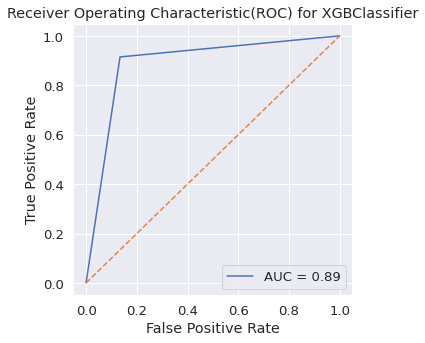

In [364]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)

auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5, 5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for XGBClassifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Model 5 : LGBMClassifier

#### Implementing RandomizedSearchCV to identify the best parameters

In [365]:
# from sklearn.model_selection import RandomizedSearchCV
# gridParams = {
#     'learning_rate': [0.05,0.04,0.03,0.07,0.09],
#     'num_leaves': range(30,200,5),
#     'max_depth' : range(3,16),
#     'colsample_bytree' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
#     'min_split_gain' : [0.01],
#     'min_data_in_leaf' : range(3,15)
#     }

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
# ],remainder='passthrough')
# step2 = RandomizedSearchCV(LGBMClassifier(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=100)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,Y_train)

#### Printing best parameters

In [366]:
# print(step2.best_params_)
# {'num_leaves': 75, 'min_split_gain': 0.01, 'min_data_in_leaf': 11, 'max_depth': 4, 'learning_rate': 0.04, 'colsample_bytree': 0.4}

### Analysing 5th model

In [367]:
# using_LGBMClassifier

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
],remainder='passthrough')
step2 = LGBMClassifier(num_leaves=75, min_split_gain = 0.01, min_data_in_leaf = 11, max_depth = 4, learning_rate = 0.04, colsample_bytree = 0.4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)
print('Accuracy score',accuracy_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


Accuracy score 0.8876811594202898
MAE 0.11231884057971014


#### Classification report of 5th model on the given dataset

In [368]:
report_rfc = pd.DataFrame(classification_report(Y_test, y_pred, 
                                               output_dict=True, 
                                               target_names=["0", "1"]))
report_rfc

,0,1,accuracy,macro avg,weighted avg
precision,0.852174,0.913043,0.887681,0.882609,0.888343
recall,0.875000,0.896341,0.887681,0.885671,0.887681
f1-score,0.863436,0.904615,0.887681,0.884026,0.887905
support,112.000000,164.000000,0.887681,276.000000,276.000000


#### ROC for 5th model

Text(0.5, 0, 'False Positive Rate')

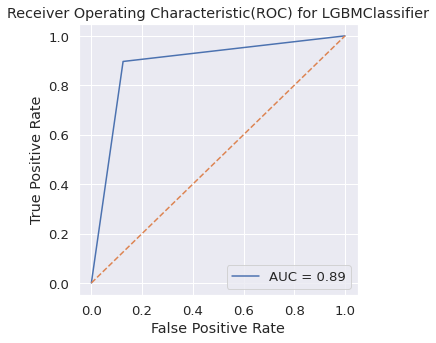

In [369]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)

auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5, 5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = %0.2f"%auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for LGBMClassifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Building a pipeline of these 5 models

#### Importing necessary libraries

In [370]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

#### Adding all the models into the pipeline with their best parameters

In [371]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,2,6,8,10])
],remainder='passthrough')


rfc =RandomForestClassifier(min_samples_split = 5, max_features = 'auto', criterion = 'entropy', n_estimators = 141, min_samples_leaf = 4, max_depth = 8, random_state=39)
knn = KNeighborsClassifier(weights = 'distance', p=1, n_neighbors = 7, leaf_size = 36)
dtc = DecisionTreeClassifier(min_samples_split = 7, max_features = 'auto', criterion = 'entropy', splitter = 'best' , min_samples_leaf = 7, max_depth = 7, random_state=0)
xgb = XGBClassifier(n_estimators = 39, max_depth = 3)
lgbm = LGBMClassifier(num_leaves=75, min_split_gain = 0.01, min_data_in_leaf = 11, max_depth = 4, learning_rate = 0.04, colsample_bytree = 0.4)

step2 = VotingClassifier([('rfc', rfc), ('knn', knn), ('dtc', dtc), ('xgb',xgb), ('lgbm',lgbm)])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('Accuracy score',accuracy_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

Accuracy score 0.894927536231884
MAE 0.10507246376811594


#### Opening the pickle file

In [372]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

#### Downloading the pickle file

In [277]:
from google.colab import files
files.download('pipe.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting Heart Failure of a random person with given feature values

In [374]:
# you have to make a list, containing all the feature values at their respective respective indexes
# add that list in model.predict
# run this block
# if the output is yes, then heart is failed, else it is not.
''' list format according to features ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'] '''
import joblib
model = joblib.load('/content/pipe.pkl')
result = model.predict([[60,'M','ASY',180, 300, 0, 'ST', 200, 'Y', 1.5, 'Up']])[0]
if(result==1):
  print("Yes")
else:
  print("No")

Yes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

